In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
df = pd.read_csv('./data-analysis-test-data.csv')

### Información descriptiva de las variables del problema:

- Meses de suscripción: Antiguedad del cliente en meses
- Fuga: Variable cuantitativa discreta (booleana): 1 -> el cliente eliminó la cuenta en los 30 días posteriores. 0 el cliente continua suscripto
- IS: indice de satisfacción del cliente respecto al servicio
- Nro de casos de soporte: Cantidad de veces que el cliente se contactó con servicio técnico y fue atendido
- Variación en los últimos 30 días del número de casos de soporte observados en el último mes
- Prioridad del soporte: Grado promedio de gravedad del soporte y solicitud del soporte
- Variación de la prioridad del soporte: Variación en los últimos 30 días de la gravedad promedio de la solicitud de soporte
- Var nro logins: Variación en los últimos 30 días del número de veces que un cliente se conectó al servicio
- Var uso del servicio: Variación en los últimos 30 días del número de veces que el cliente utilizó el servicio
- Var. Exposición del producto del Cliente: Variación en los últimos 30 días de la exposición del producto que tuvo el cliente por utilizar el servicio (cuánta gente vio su producto)
- Variación en los últimos 30 días del número de días desde su última conexión

### Objetivo

Dado que el core business de ECOMM es la suscripción a su producto, el objetivo buscado será minimizar la cantidad de bajas en la suscripción y maximizar suscripción de clientes que todavía no consumen el servicio.

### Preguntas
- ¿El precio de la suscripción aumenta respecto al tamaño de la compañia del cliente?
- ¿Qué relación tiene la suscripción respecto al ingreso del cliente?
- ¿Como se mide el grado de utilización de este producto? Más allá de la satisfacción percibida del lado del cliente, hay alguna variable que indique que tan útil es el producto para el revenue del cliente?
- ¿Cómo se mide el indice de satsifacción? ¿Razón de ser de la escala?

### Sample de bajas a la suscripción

In [289]:
df[df['Fuga'] == 1].head()

,ID,Meses de suscripción,Fuga,Índice de Satisfacción (IS),Var. del IS,Nro. de Casos de Soporte,Var. Nro. de Casos de Soporte,Prioridad del Soporte,Var. de la Prioridad del Soporte,Var. Nro. Logins,Var. Uso del Servicio,Var. Beneficio para el Cliente,Var. Días desde Ult. Conexión
19,20,94,1,0,-52,0,0,0.0,0.0,-14,0,0,-53
21,22,26,1,244,62,12,8,3.0,0.0,188,8,-2,-9
90,91,28,1,52,-2,0,0,0.0,0.0,8,0,-20,-3
98,99,24,1,0,0,0,0,0.0,0.0,0,0,0,31
104,105,26,1,294,2,4,4,3.0,3.0,48,0,-428,-1


In [9]:
df.sample(3)

,ID,Meses de suscripción,Fuga,Índice de Satisfacción (IS),Var. del IS,Nro. de Casos de Soporte,Var. Nro. de Casos de Soporte,Prioridad del Soporte,Var. de la Prioridad del Soporte,Var. Nro. Logins,Var. Uso del Servicio,Var. Beneficio para el Cliente,Var. Días desde Ult. Conexión
1400,1401,6,0,6,6,0,0,0.000000,0.000000,12,0,0,0
799,800,36,0,256,40,0,0,0.000000,0.000000,12,0,-60,20
1319,1320,16,0,184,84,6,4,2.666667,-0.333333,30,0,0,5


In [290]:
numeric_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

### Variables numéricas y categóricas

<AxesSubplot: >

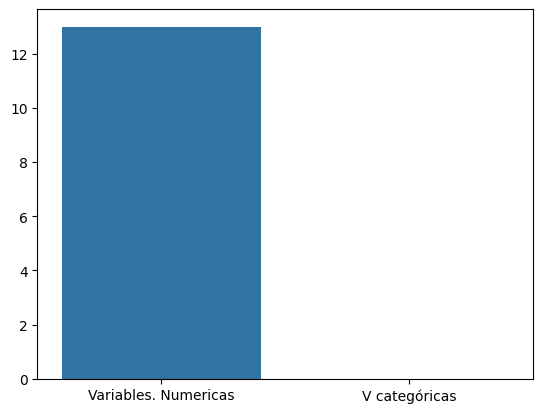

In [291]:
sns.barplot(x=['Variables. Numericas','V categóricas'],y=[len(numeric_features),len(categorical_features)])

> Al tratarte 100% de variables numéricas, no nos tendremos que preocupar por un Encoding de los datos. Lo que tendrémos que tener en cuenta a futuro, es la escala en la que trabajaremos las variables numéricas y deberemos normalizarlas para no sesgar nuestro análisis.

### Valores Nulos & Na

In [16]:
df.isnull().sum()

ID                                  0
Meses de suscripción                0
Fuga                                0
Índice de Satisfacción (IS)         0
Var. del IS                         0
Nro. de Casos de Soporte            0
Var. Nro. de Casos de Soporte       0
Prioridad del Soporte               0
Var. de la Prioridad del Soporte    0
Var. Nro. Logins                    0
Var. Uso del Servicio               0
Var. Beneficio para el Cliente      0
Var. Días desde Ult. Conexión       0
dtype: int64

In [17]:
df.isna().sum()

ID                                  0
Meses de suscripción                0
Fuga                                0
Índice de Satisfacción (IS)         0
Var. del IS                         0
Nro. de Casos de Soporte            0
Var. Nro. de Casos de Soporte       0
Prioridad del Soporte               0
Var. de la Prioridad del Soporte    0
Var. Nro. Logins                    0
Var. Uso del Servicio               0
Var. Beneficio para el Cliente      0
Var. Días desde Ult. Conexión       0
dtype: int64

Al no tener valores Nulos ni Na no tenemos que aplicar ninguna técnica de reemplazo por alguna medida de tendencia central

## Fuga
Haremos un análisis descriptivo para evaluar la fuga del cliente respecto a los features provistos.

### Porcentaje de NO fuga (suscriptores)

In [396]:
total_registros = len(df)
fugas_uno = df[df['Fuga'] == 1]
fugas_cero = df[df['Fuga'] == 0]
# Contar la cantidad de registros con Fuga igual a 0

porcentaje_fugas_cero = (len(fugas_cero) / total_registros) * 100
porcentaje_fugas_uno = (len(fugas_uno) / total_registros) * 100
print(f"Porcentaje de Fuga igual a 0 sobre el total de registros: {porcentaje_fugas_cero:.2f}%")
print(f"Porcentaje de Fuga igual a 1 sobre el total de registros: {porcentaje_fugas_uno:.2f}%")

Porcentaje de Fuga igual a 0 sobre el total de registros: 95.28%
Porcentaje de Fuga igual a 1 sobre el total de registros: 4.72%


Con esto en mente, vemos que el 95.28% de los usuarios, actualmente, son activos.

### Baja de suscripción en el mes 0 o 1

In [298]:
fugas_en_mes_cero_o_uno = df[(df['Fuga'] == 1) & ((df['Meses de suscripción'] == 0) | (df['Meses de suscripción'] == 1))] 
print(f"Fugas en mes 0 o en mes 1: {len(fugas_en_mes_cero_o_uno):.2f}%")

Fugas en mes 0 o en mes 1: 0.00%


### Porcentaje de Fugas y porcentaje de Usuarios activos

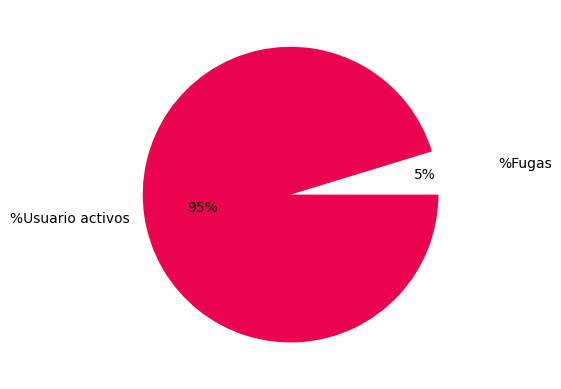

In [397]:
data = [porcentaje_fugas_uno, porcentaje_fugas_cero]
explode = [0.3, 0.02]
labels = ["%Fugas", "%Usuario activos"]
colors = ["White", "#EA044E"] 
plt.pie(data, labels=labels, colors=colors, autopct="%0.0f%%", explode=explode)
plt.show()

### Duración de la suscripción agrupado por fuga

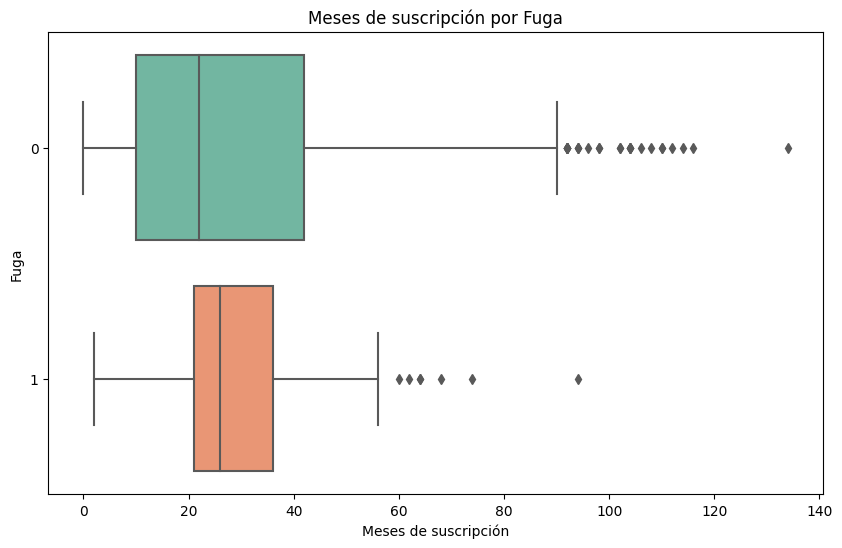

In [398]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meses de suscripción', y='Fuga', data=df, orient='h', palette='Set2')
plt.title('Meses de suscripción por Fuga')
plt.xlabel('Meses de suscripción')
plt.ylabel('Fuga')
plt.show()


> En un principio, esta variable no es explicativa en cuanto al comportamiento del usuario

### Distribución del índice de satisfacción

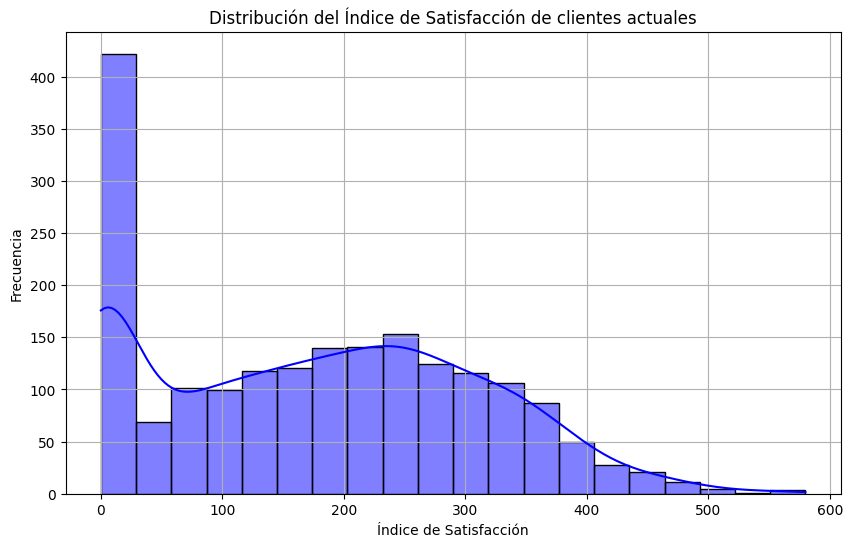

In [399]:
plt.figure(figsize=(10, 6))
sns.histplot(fugas_cero['Índice de Satisfacción (IS)'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribución del Índice de Satisfacción de clientes actuales')
plt.xlabel('Índice de Satisfacción')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


### Distribución Indice de satisfacción por fuga 1

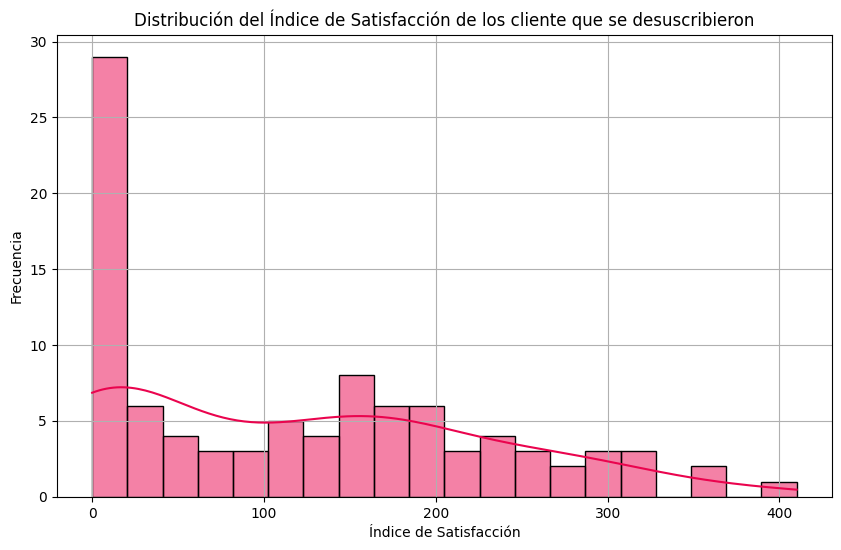

In [411]:
plt.figure(figsize=(10, 6))
sns.histplot(fugas_uno['Índice de Satisfacción (IS)'], bins=20, kde=True, color='#ea044e', edgecolor='black')
plt.title('Distribución del Índice de Satisfacción de los cliente que se desuscribieron')
plt.xlabel('Índice de Satisfacción')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


A simple vista puede notarse que hay gran concentración con bajo indice de satisfacción por el producto.

> ¿Cómo y en qué momento se mide el IS? ¿Por qué hay tantos con 0?

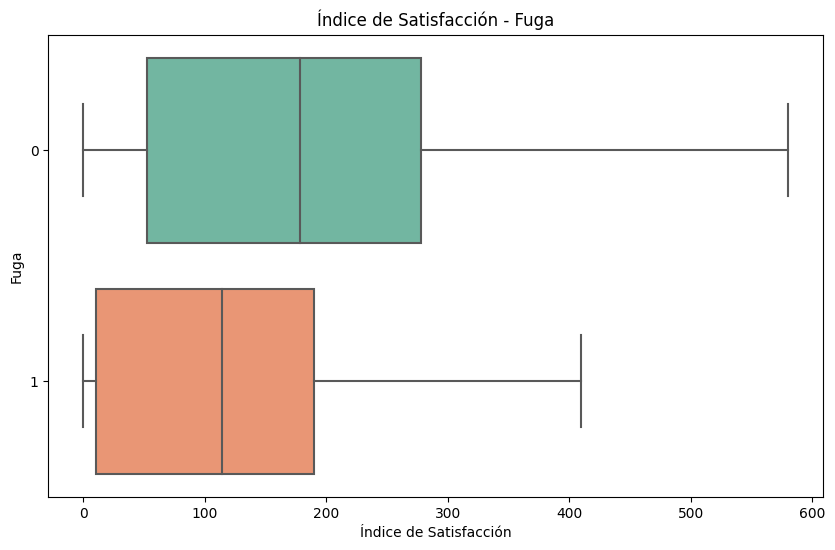

In [412]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Índice de Satisfacción (IS)', y='Fuga', data=df, orient='h', palette='Set2')
plt.title('Índice de Satisfacción - Fuga')
plt.xlabel('Índice de Satisfacción')
plt.ylabel('Fuga')
plt.show()


Basado en los datos, se ve que las personas que dan de baja el servicio, en todo el espectro de percentiles, tiene un grado de satisfacción más bajo por el producto.

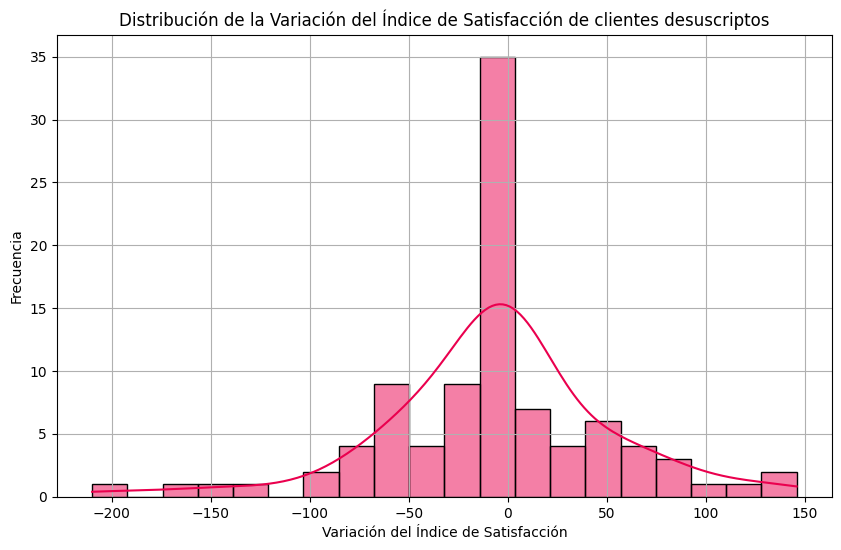

In [407]:
plt.figure(figsize=(10, 6))
sns.histplot(fugas_uno['Var. del IS'], bins=20, kde=True, color='#ea004e', edgecolor='black')
plt.title('Distribución de la Variación del Índice de Satisfacción de clientes desuscriptos')
plt.xlabel('Variación del Índice de Satisfacción')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


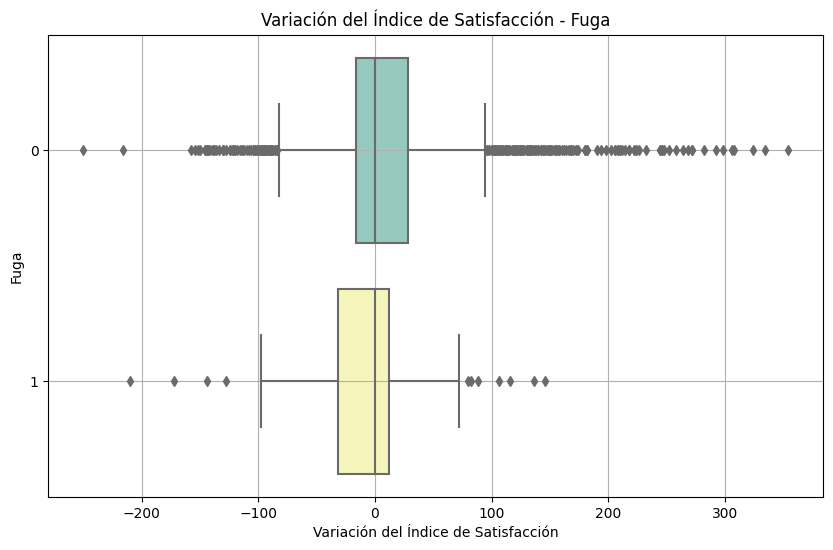

In [306]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Fuga', x='Var. del IS',orient='h' , data=df, palette='Set3')
plt.title('Variación del Índice de Satisfacción - Fuga')
plt.xlabel('Variación del Índice de Satisfacción')
plt.ylabel('Fuga')
plt.grid(True)
plt.show()

La mediana es 0, es decir, tenemos una concentración de casos en los que el IS no varia. Por otra parte, las personas que se desuscribieron, el último mes experimentaron un mayor grado de insatisfacción por el producto. Deberíamos evaluar como esta variable se relaciona con otras para entender porque tuvieron mayor grado de insatisfacción el último mes y si el resultado es estadísticamente significativo dada la poca cantidad de muestras.

In [422]:
total_casos_soporte_fugas_cero = fugas_cero['Nro. de Casos de Soporte'].sum()
total_casos_soporte_fugas_uno = fugas_uno['Nro. de Casos de Soporte'].sum()

### Casos de soporte - Fuga

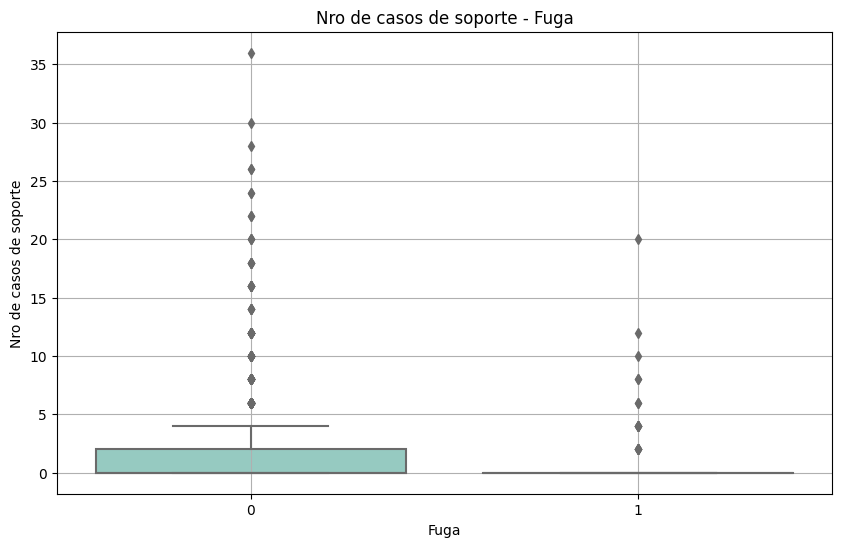

In [429]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuga', y='Nro. de Casos de Soporte' , data=df, palette='Set3')
plt.title('Nro de casos de soporte  Fuga')
plt.xlabel('Fuga')
plt.ylabel('Nro de casos de soporte')
plt.grid(True)
plt.show()

> Vemos que las personas que se desuscriben del servicio, no interactuan mucho con el área de soporte solo en algunos casos aislados.

### Prioridad soporte - Fuga

In [308]:
print("media de prioridad de soporte - baja de suscripción",fugas_uno['Prioridad del Soporte'].describe()['mean'])

media de prioridad de soporte - baja de suscripción 0.5421052631578948


In [309]:
print("media de prioridad de soporte - suscriptos",fugas_cero['Prioridad del Soporte'].describe()['mean'])

media de prioridad de soporte - suscriptos 0.8200168086713614


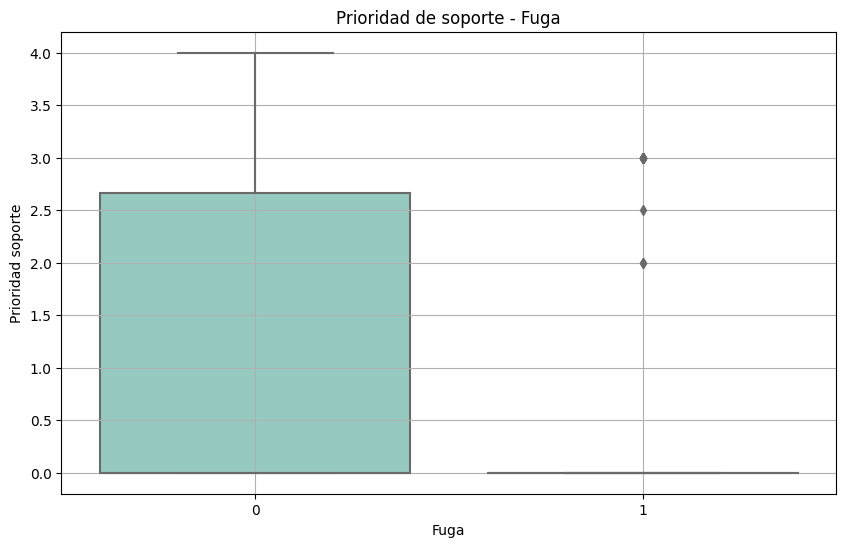

In [428]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuga', y='Prioridad del Soporte' , data=df, palette='Set3')
plt.title('Prioridad de soporte - Fuga')
plt.xlabel('Fuga')
plt.ylabel('Prioridad soporte')
plt.grid(True)
plt.show()

> Vemos que por lo general, la gente que se desuscribe, no parece tener prioridad en el soporte técnico solo algunos casos aislados

Análisis de casos de Login respecto a la desuscripción del cliente

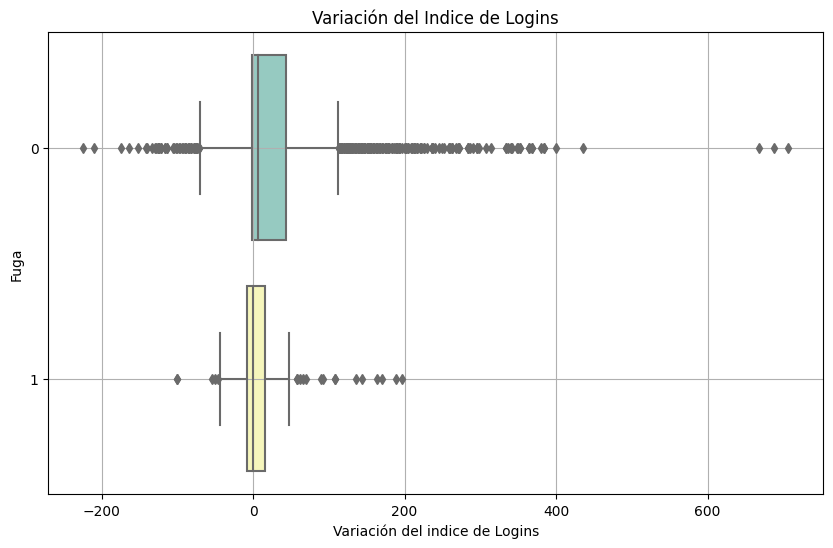

In [311]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Var. Nro. Logins', y='Fuga', orient='h',data=df, palette='Set3')
plt.title('Variación del Indice de Logins')
plt.xlabel('Variación del indice de Logins')
plt.ylabel('Fuga')
plt.grid(True)
plt.show()

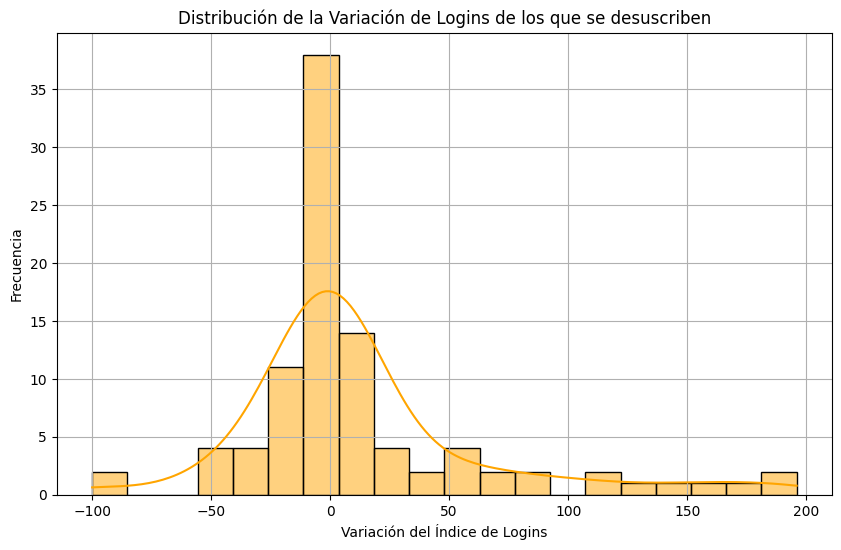

In [312]:
plt.figure(figsize=(10, 6))
sns.histplot(fugas_uno['Var. Nro. Logins'], bins=20, kde=True, color='orange', edgecolor='black')
plt.title('Distribución de la Variación de Logins de los que se desuscriben')
plt.xlabel('Variación del Índice de Logins')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

> Las personas que se desuscriben vemos que no se conectan tan seguido como las personas que se mantienen como clientes. Puede ser que no entiendan la herramienta o que no le vean la utilidad respecto a su negocio.

### Variabilidad días respecto última conexion - Fuga 

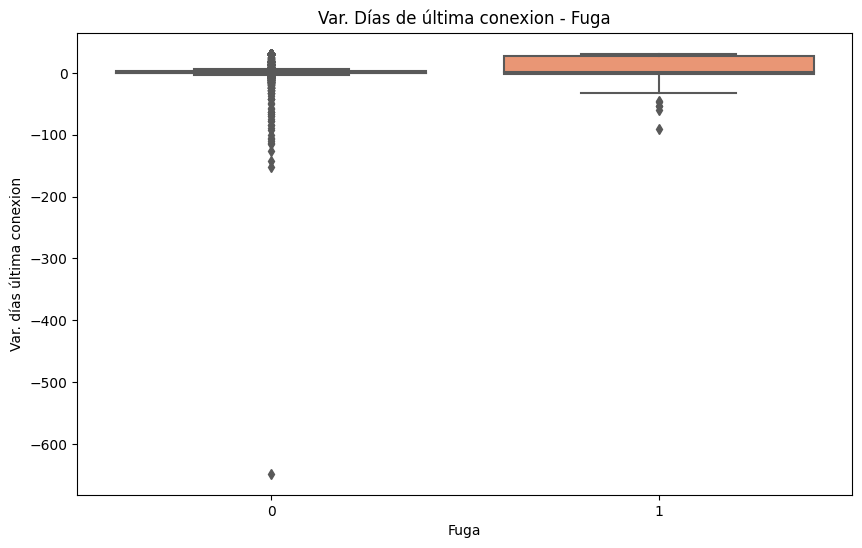

In [315]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuga', y='Var. Días desde Ult. Conexión', data=df, palette='Set2')
plt.title('Var. Días de última conexion - Fuga')
plt.xlabel('Fuga')
plt.ylabel('Var. días última conexion')
plt.show()


> Observamos que las personas que se desuscriben tienen un gap mayor de días sin conectarse al sistema. Todavía no entendemos por qué. Puede ser porque no entienden como funciona o pueden ser empresas que no tienen implementado un proceso de gestión y por lo tanto no usan el sistema.

### Var. Uso del servicio para el Cliente que se desuscribió

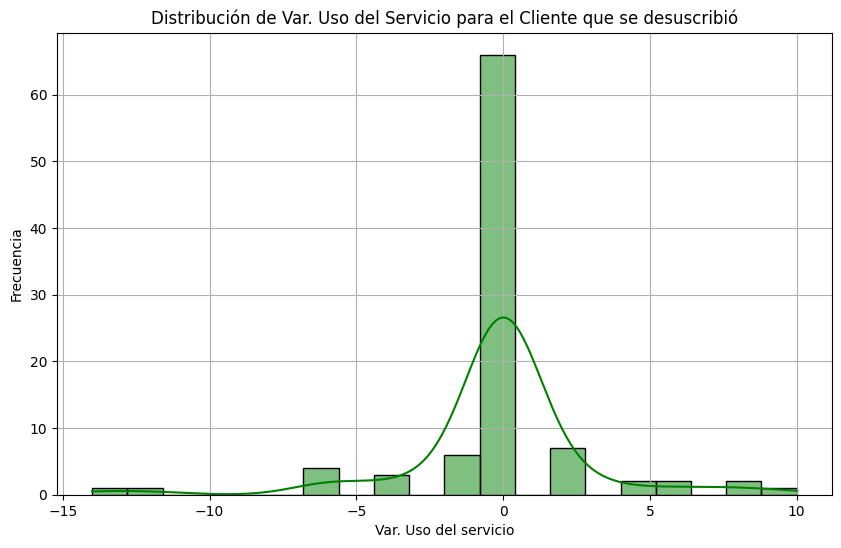

In [432]:
plt.figure(figsize=(10, 6))
sns.histplot(fugas_uno['Var. Uso del Servicio'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Distribución de Var. Uso del Servicio para el Cliente que se desuscribió')
plt.xlabel('Var. Uso del servicio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


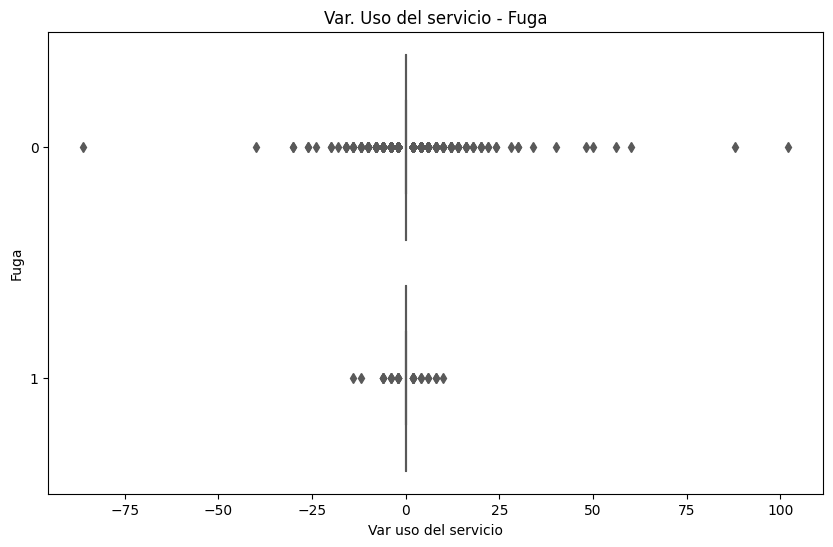

In [319]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Var. Uso del Servicio', y='Fuga', data=df, orient='h', palette='Set2')
plt.title('Var. Uso del servicio - Fuga')
plt.xlabel('Var uso del servicio')
plt.ylabel('Fuga')
plt.show()


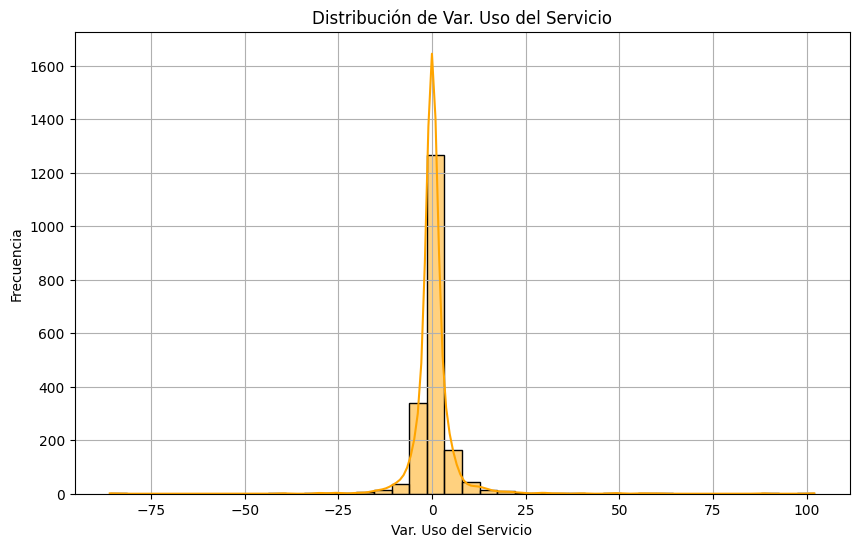

In [322]:
plt.figure(figsize=(10, 6))
sns.histplot(fugas_cero['Var. Uso del Servicio'], bins=40, kde=True, color='orange', edgecolor='black')
plt.title('Distribución de Var. Uso del Servicio')
plt.xlabel('Var. Uso del Servicio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [179]:
print("Descripción de la var. de uso del servicio respecto a los desuscriptos: \r\n",fugas_uno['Var. Uso del Servicio'].describe())

Descripción de la var. de uso del servicio respecto a los desuscriptos: 
 count    95.000000
mean     -0.147368
std       3.118130
min     -14.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      10.000000
Name: Var. Uso del Servicio, dtype: float64


In [323]:
print("Descripción de la var. de uso del servicio respecto a los clientes actuales: \n",fugas_cero['Var. Uso del Servicio'].describe())

Descripción de la var. de uso del servicio respecto a los clientes actuales: 
 count    1917.000000
mean        0.315076
std         6.277910
min       -86.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       102.000000
Name: Var. Uso del Servicio, dtype: float64


> A priori no parece significativa la variable uso de servicio respecto a la fuga.

In [332]:
### Var. Beneficio para el Cliente

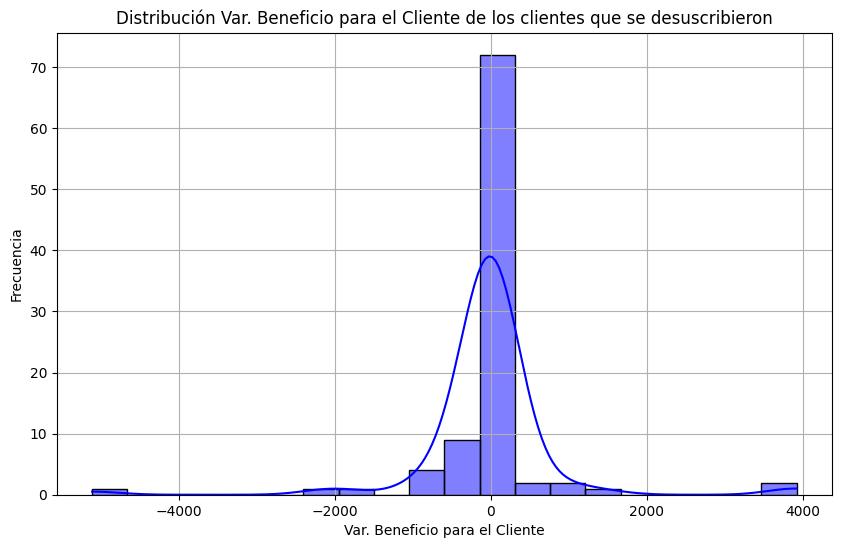

In [435]:
plt.figure(figsize=(10, 6))
sns.histplot(fugas_uno['Var. Beneficio para el Cliente'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribución Var. Beneficio para el Cliente de los clientes que se desuscribieron')
plt.xlabel('Var. Beneficio para el Cliente')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


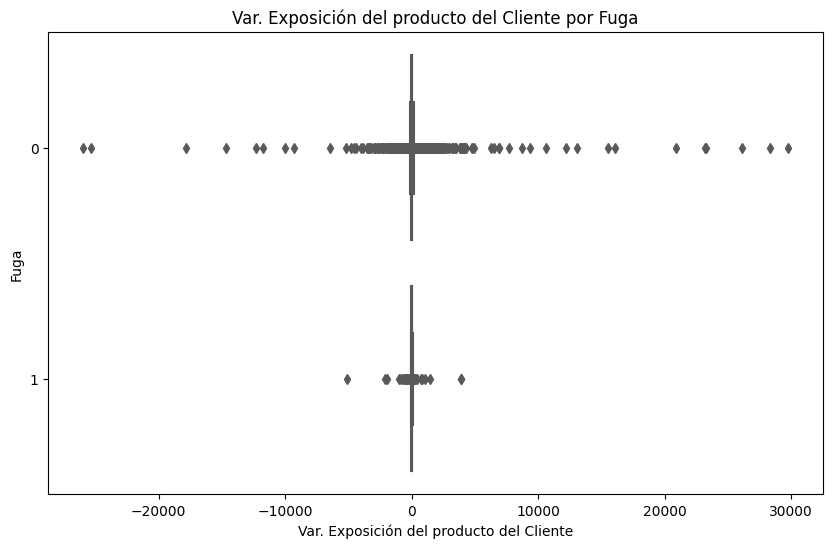

In [436]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Var. Beneficio para el Cliente', y='Fuga', data=df, orient='h', palette='Set2')
plt.title('Var. Exposición del producto del Cliente por Fuga')
plt.xlabel('Var. Exposición del producto del Cliente')
plt.ylabel('Fuga')
plt.show()

In [365]:
df = df.drop('ID',axis=1)

### Matriz de correlación

In [366]:
k = 6
corrmat = df.corr()
cols = corrmat.nlargest(k,'Fuga')['Fuga'].index

<AxesSubplot: >

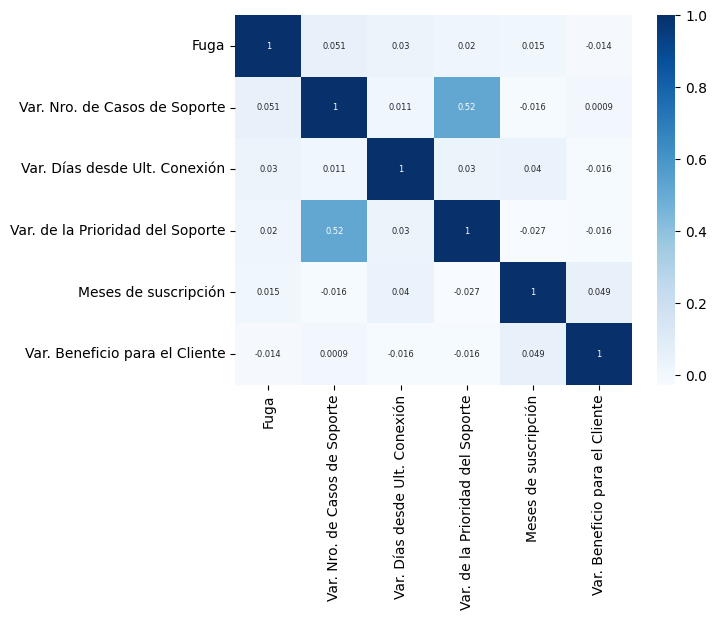

In [367]:
cm = np.corrcoef(df[cols].values.T) 
sns.heatmap(cm,annot=True, cmap='Blues', annot_kws={'size':k}, yticklabels=cols.values, xticklabels=cols.values)

Podemos tratar de normalizar las variables a ver si la escala es la que desfavorece la relación entre las variables y nuetra variable objetivo "fuga"

In [368]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [369]:
fugas_uno_sin_is_cero = fugas_uno[fugas_uno['Índice de Satisfacción (IS)'] > 0]

In [370]:
df['Índice de Satisfacción (IS)'] = scaler.fit_transform(df[['Índice de Satisfacción (IS)']])
df['Var. del IS'] = scaler.fit_transform(df[['Var. del IS']])
df['Var. Nro. Logins'] = scaler.fit_transform(df[['Var. Nro. Logins']])
df['Var. Días desde Ult. Conexión'] = scaler.fit_transform(df[['Var. Días desde Ult. Conexión']])

In [371]:
fugas_cero = df[df['Fuga'] == 0 ]
fugas_uno = df[df['Fuga'] == 1 ]

<AxesSubplot: >

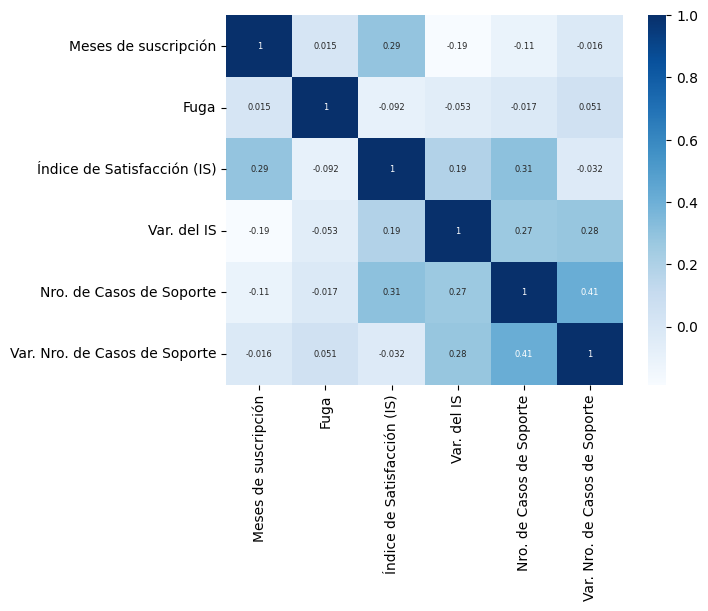

In [372]:
k = 6
corrmat = fugas_cero.corr()
cols = corrmat.nlargest(k,'Fuga')['Fuga'].index
cm = np.corrcoef(df[cols].values.T) 
sns.heatmap(cm,annot=True, cmap='Blues', annot_kws={'size':k}, yticklabels=cols.values, xticklabels=cols.values)

<AxesSubplot: >

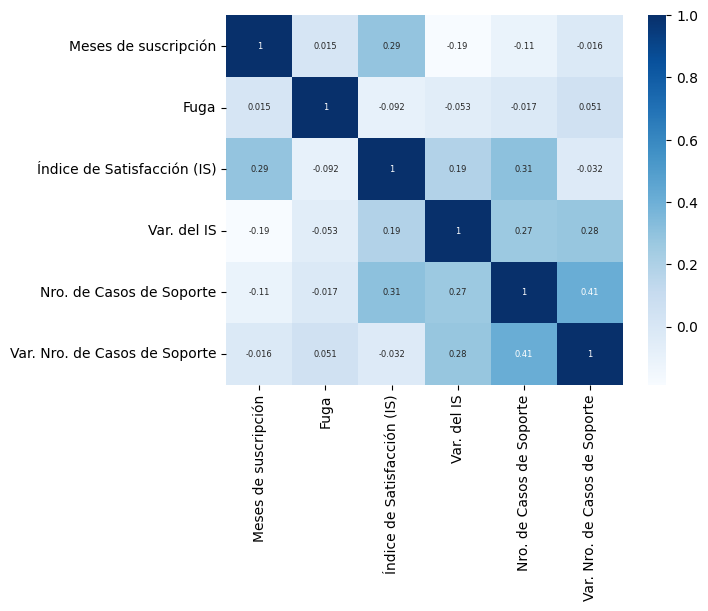

In [376]:
k = 6
corrmat = fugas_uno.corr()
cols = corrmat.nlargest(k,'Fuga')['Fuga'].index
cm = np.corrcoef(df[cols].values.T) 
sns.heatmap(cm,annot=True, cmap='Blues', annot_kws={'size':k}, yticklabels=cols.values, xticklabels=cols.values)

<AxesSubplot: >

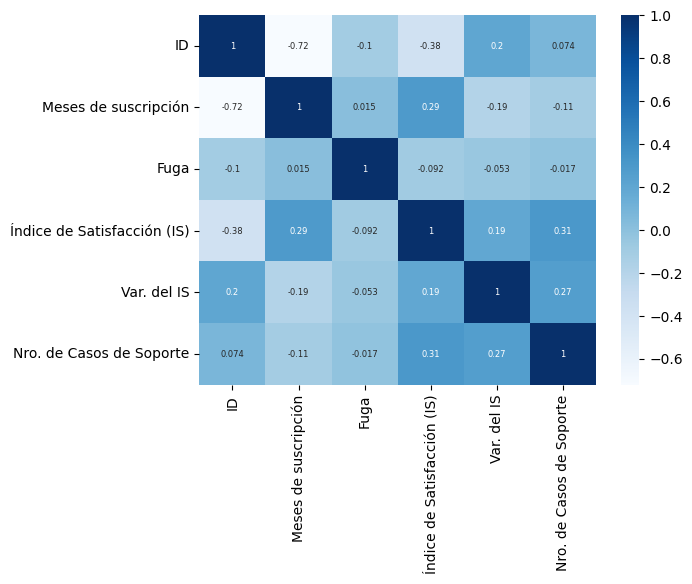

In [352]:
### Análisis de correlación con fugas_uno y con IS > 0
k = 6
corrmat = fugas_uno_sin_is_cero.corr()
cols = corrmat.nlargest(k,'Fuga')['Fuga'].index
cm = np.corrcoef(df[cols].values.T) 
sns.heatmap(cm,annot=True, cmap='Blues', annot_kws={'size':k}, yticklabels=cols.values, xticklabels=cols.values)

> Observamos a priori que la desuscripción del usuario no está explicada por las variables dispuestas en el problema. Nos queda pensar factores externos a los recolectados que puedan estar inlfuyendo en la toma de decisión de la desuscripción del cliente.

No se encuentra una relación lineal entre las variables, podemos seguir investigando con PCA

Técnicamente, el PCA busca la proyección según la cual los datos queden mejor representados en términos de mínimos cuadrados. Esta convierte un conjunto de observaciones de variables posiblemente correlacionadas en un conjunto de valores de variables sin correlación lineal llamadas componentes principales

In [219]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

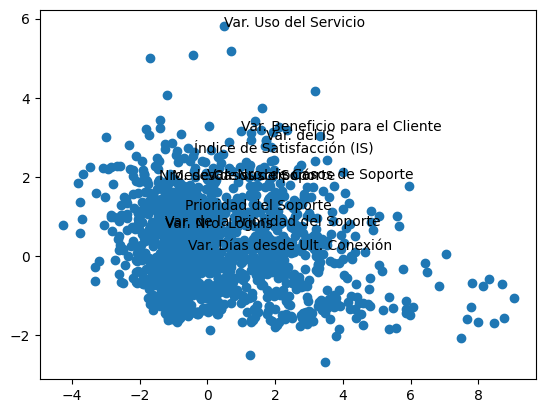

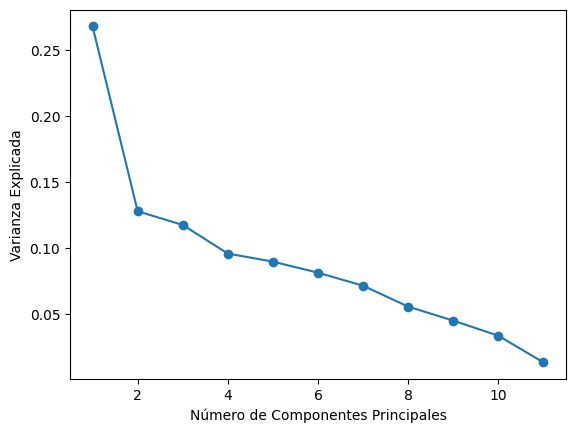

Variable más importante por PC1: Prioridad del Soporte
Variable más importante por varianza: Meses de suscripción


In [236]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

target_variable = 'Fuga'
X = df.drop(columns=[target_variable])
y = df[target_variable]


scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_standardized)


principal_components = pd.DataFrame(pca.components_, columns=X.columns)
explained_variance_ratio = pca.explained_variance_ratio_

variable_mas_relevante_pc1 = principal_components.abs().iloc[0,:].sort_values(ascending=False).index[0]


variable_mas_relevante_varianza = explained_variance_ratio.argmax()

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, var in enumerate(X.columns):
    plt.annotate(var, (X_pca[:, 0][i], X_pca[:, 1][i]))
plt.show()


plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.show()


print("Variable más importante por PC1:", variable_mas_relevante_pc1)
print("Variable más importante por varianza:", X.columns[variable_mas_relevante_varianza])


**Esto se contrasta de alguna forma con los datos obtenidos más arriba ya que las personas que se desuscriben al servicio parecen no no tener ni contacto ni prioridad con soporte.**

En base a este análisis, surgen nuevas preguntas:
- ¿En que momento se mide en indice de satisfacción del cliente?

Y algunas ideas para poder recolectar más información:

- Deberían almacenarse datos temporales de las variables principalmente:
    - Prioridad de soporte
    - Conexiones por mes
    - Beneficio para el cliente
    - Indice de satisfacción
    
Ya que sería relevante tener un histórico respecto a estas variables para tomar acción temprana si vemos algún comportamiento anómalo.

Por otra parte, a priori, estas variables no parecen explicar de forma acertada el comportamiento del usuario a la hora de desuscribirse, por lo tanto, agregando datos registros mes a mes de las acciónes y la satisfacción del cliente, podríamos recolectar más información y analizar con otra herramientas el problema. Además, sería prudente agregar datos del tipo:
- Cuantas ventas se concretaron gracias a la plataforma
- Cobro mensual del servicio ECOMM
- Complejidad del uso del sistema
- ¿Qué features tiene ECOMM? 
- corregir: a cuantas personas llega ECOMM?
- Tamaño y cultura de la compañia (¿Usan de forma correcta la herramienta?)
- En caso de soporte, deberíamos tipificar el problema por el cual el cliente pidió ayuda.

En función de estas nuevas variables y como acción temprana, podríamos 

Implementar programas de fidelización basados en los hallazgos. Puede incluir descuentos, beneficios exclusivos o programas de recompensas adaptados a nuestros clientes por segmentos.